Developer: Brady Lange

Date: 04/14/2020

Course: CSIS 452

Description:

In [51]:
# Import required libraries
import pickle
from six.moves import urllib
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split

In [52]:
DATASETS_ROOT = "http://archive.ics.uci.edu/ml/machine-learning-databases/"
PM2_5_PATH = os.path.join("datasets", "pm2_5")
FILE = "PRSA_data_2010.1.1-2014.12.31.csv"
PM2_5_URL = DATASETS_ROOT + "00381/" + FILE

In [53]:
def fetch_dataset(dataset_url, dataset_path, file_name):
    '''
    
    '''
    if not os.path.isdir(dataset_path):
        os.makedirs(dataset_path)
    
    file_path = os.path.join(dataset_path, file_name)
    
    if os.path.exists(file_path):
        return None
        
    local_file_name, headers = urllib.request.urlretrieve(dataset_url, file_path)
    dataset_file = open(local_file_name)
    dataset_file.close()
    
def load_dataset(dataset_path, file_name):
    file_path = os.path.join(dataset_path, file_name)
    file = pd.read_csv(file_path)
    return file

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y = None):
        return self
    
    def transform(self, df):
        return df[self.attribute_names].values
    
    
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_snow_rain_sum = False):
        self.add_snow_rain_sum = add_snow_rain_sum
        
    def fit(self, X, y = None):
        return self
        
    def transform(self, df):
        if self.add_snow_rain_sum is True:
            snow_rain_sum = (df["ls"] + df["lr"]).values.reshape(-1, 1)
            return np.hstack([df, snow_rain_sum])
        else:
            return df

   No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd    Iws  Is  Ir
0   1  2010      1    1     0    NaN   -21 -11.0  1021.0   NW   1.79   0   0
1   2  2010      1    1     1    NaN   -21 -12.0  1020.0   NW   4.92   0   0
2   3  2010      1    1     2    NaN   -21 -11.0  1019.0   NW   6.71   0   0
3   4  2010      1    1     3    NaN   -21 -14.0  1019.0   NW   9.84   0   0
4   5  2010      1    1     4    NaN   -20 -12.0  1018.0   NW  12.97   0   0 

          No  year  month  day  hour  pm2.5  DEWP  TEMP    PRES cbwd     Iws  \
43819  43820  2014     12   31    19    8.0   -23  -2.0  1034.0   NW  231.97   
43820  43821  2014     12   31    20   10.0   -22  -3.0  1034.0   NW  237.78   
43821  43822  2014     12   31    21   10.0   -22  -3.0  1034.0   NW  242.70   
43822  43823  2014     12   31    22    8.0   -22  -4.0  1034.0   NW  246.72   
43823  43824  2014     12   31    23   12.0   -21  -3.0  1034.0   NW  249.85   

       Is  Ir  
43819   0   0  
43820   0   0  
43821  

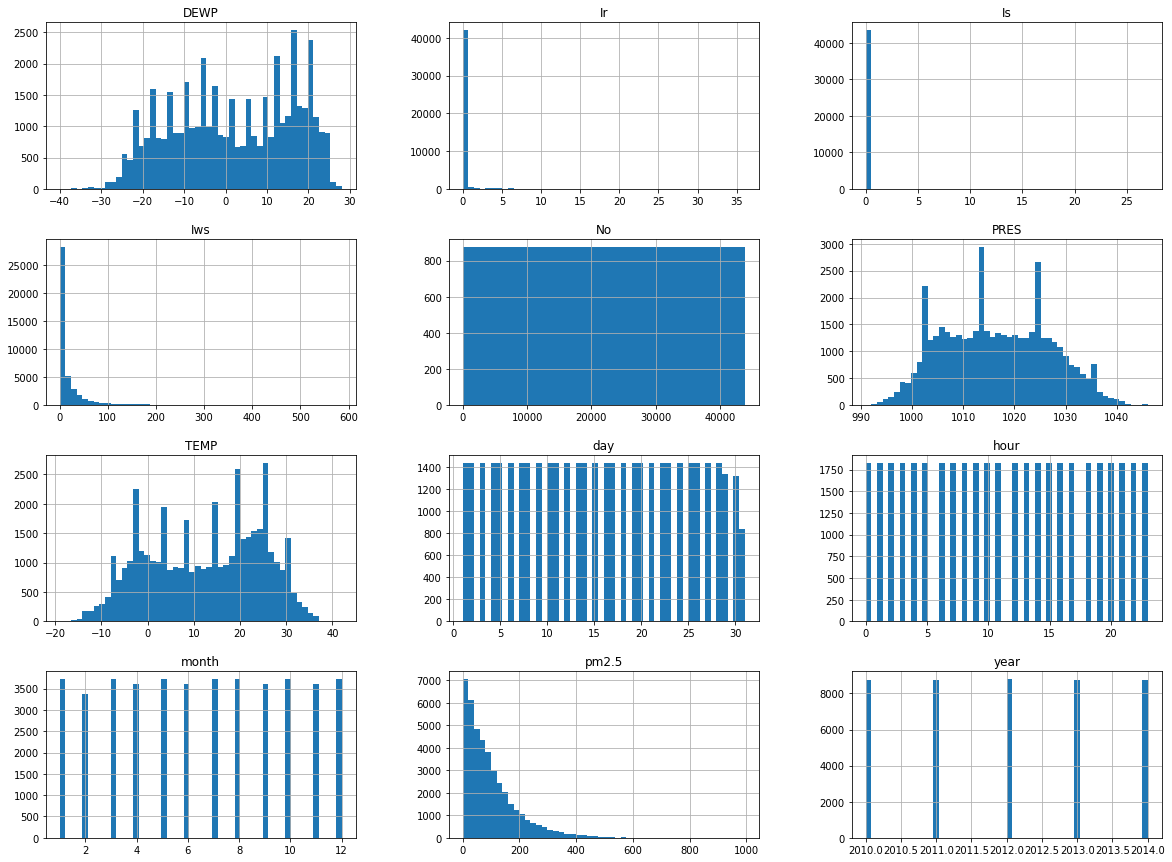

In [54]:
# Fetch PM2.5 dataset and download it locally
fetch_dataset(PM2_5_URL, PM2_5_PATH, FILE)

# Load PM2.5 dataset
pm2_5 = load_dataset(PM2_5_PATH, FILE)

print(pm2_5.head(), "\n")
print(pm2_5.tail(), "\n")
print(pm2_5.info(), "\n")
print(pm2_5.describe(), "\n")
print(pm2_5.count(), "\n")
print(pm2_5.isnull().sum(), "\n")
print(pm2_5["year"].value_counts(), "\n")
print(pm2_5["cbwd"].value_counts(), "\n")
pm2_5.hist(bins = 50, figsize = (20, 15))
plt.show()

In [57]:
# Remove unnecessary features
pm2_5_clean = pm2_5.drop(["No", "year"], axis = 1)

pm2_5_clean = pm2_5_clean.dropna(subset = ["pm2.5"])
print(pm2_5_clean.isnull().sum(), "\n")

col_idx = [pm2_5.columns.get_loc(col) for col in pm2_5]

num_feat_names = pm2_5_clean.drop(["pm2.5"], axis = 1).columns

print(num_feat_names)

num_pipeline = Pipeline(
    steps = [
        ("selector", DataFrameSelector(num_feat_names))
    ]
)

month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64 

Index(['month', 'day', 'hour', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is',
       'Ir'],
      dtype='object')
